In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
base_dir = os.path.split(os.getcwd())[0]
base_dir

'c:\\ser'

In [30]:
Ravdess = os.path.join(base_dir, 'ravdess')
print(Ravdess)

Crema = os.path.join(base_dir, 'crema', 'AudioWAV')
print(Crema)
crema_emotions = {
    'NEU': 'neutral',
    'HAP': 'happy',
    'SAD': 'sad',
    'ANG': 'angry',
    'FEA': 'fear',
    'DIS': 'disgust'
}

Savee = os.path.join(base_dir, 'surrey', 'ALL')
print(Surrey)
savee_emotions = {
    'n': 'neutral',
    'h': 'happy',
    's': 'sad',
    'a': 'angry',
    'f': 'fear',
    'd': 'disgust'
}

Tess = os.path.join(base_dir, 'tess', 'TESS Toronto emotional speech set data')
print(Tess)


c:\ser\ravdess
c:\ser\crema\AudioWAV
c:\ser\surrey\ALL
c:\ser\tess\TESS Toronto emotional speech set data


In [4]:
# CREMA

crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(os.path.join(Crema, file))
    emotion = file.split('_')[2]
    if emotion in crema_emotions:
        file_emotion.append(crema_emotions[emotion])
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,c:\ser\crema\AudioWAV\1001_DFA_ANG_XX.wav
1,disgust,c:\ser\crema\AudioWAV\1001_DFA_DIS_XX.wav
2,fear,c:\ser\crema\AudioWAV\1001_DFA_FEA_XX.wav
3,happy,c:\ser\crema\AudioWAV\1001_DFA_HAP_XX.wav
4,neutral,c:\ser\crema\AudioWAV\1001_DFA_NEU_XX.wav


In [5]:
def get_audio(df, num):
    path = df['Path'][num]
    print(path)
    audio = Audio(path)
    display(audio)

get_audio(Crema_df, 0)

c:\ser\crema\AudioWAV\1001_DFA_ANG_XX.wav


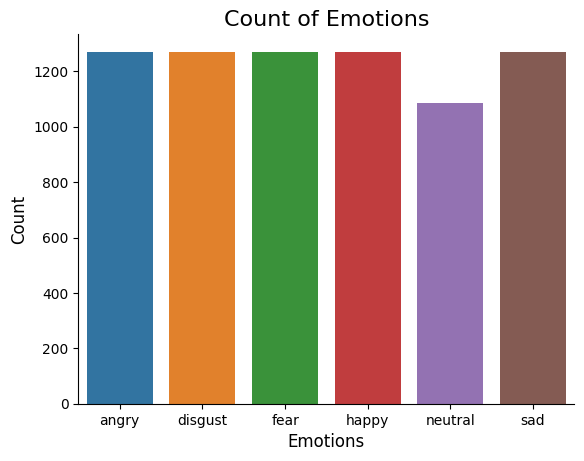

In [6]:
def print_emotion_count(df):
    plt.title('Count of Emotions', size=16)
    sns.countplot(x = df["Emotions"])
    plt.ylabel('Count', size = 12)
    plt.xlabel('Emotions', size = 12)
    sns.despine(top = True, right = True, left = False, bottom = False)
    plt.show()

print_emotion_count(Crema_df)

Text(126.09722222222221, 0.5, 'Amplitude')

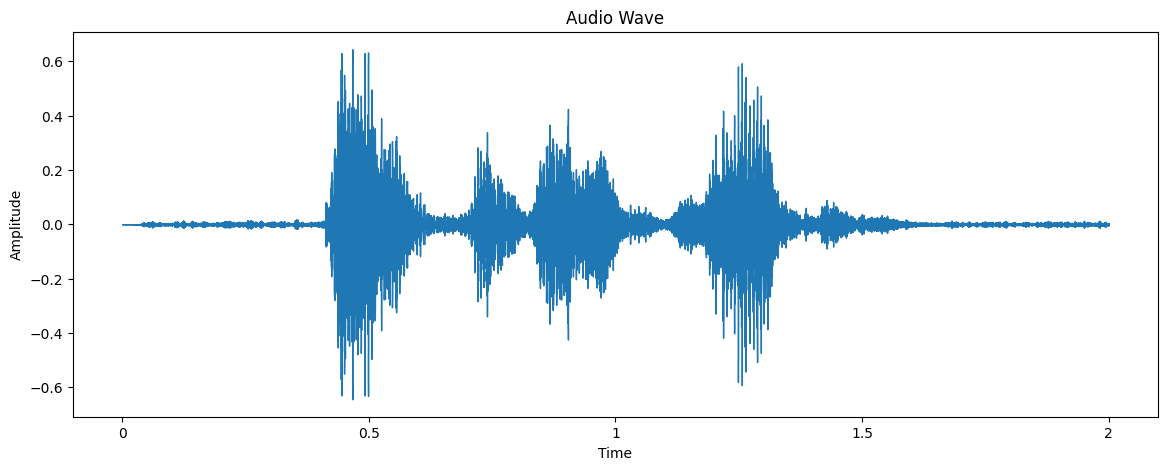

In [7]:
audio_array, sampling_rate = librosa.load(Crema_df['Path'][0], duration = 2)
plt.figure(figsize = (14, 5))
librosa.display.waveshow(audio_array, sr = sampling_rate)
plt.title('Audio Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')

https://blog.dataiku.com/speech-emotion-recognition-deep-learning#:~:text=We%20are%20going%20to%20explore%20a%20speech%20emotion,Let%E2%80%99s%20start%20by%20uploading%20the%20dataset%20in%20Dataiku.

https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio

https://devopedia.org/audio-feature-extraction

https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition

In [17]:
# TESS

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
       
        part = file.split('.')[0]
        part = part.split('_')[2]
        
        if part == 'ps':
            file_emotion.append('surprise')
        elif part == 'happy(1)':
            file_emotion.append('happy')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,c:\ser\tess\TESS Toronto emotional speech set ...
1,angry,c:\ser\tess\TESS Toronto emotional speech set ...
2,angry,c:\ser\tess\TESS Toronto emotional speech set ...
3,angry,c:\ser\tess\TESS Toronto emotional speech set ...
4,angry,c:\ser\tess\TESS Toronto emotional speech set ...


In [28]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,c:\ser\ravdessActor_01/03-01-01-01-01-01-01.wav
1,neutral,c:\ser\ravdessActor_01/03-01-01-01-01-02-01.wav
2,neutral,c:\ser\ravdessActor_01/03-01-01-01-02-01-01.wav
3,neutral,c:\ser\ravdessActor_01/03-01-01-01-02-02-01.wav
4,calm,c:\ser\ravdessActor_01/03-01-02-01-01-01-01.wav


In [31]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,c:\ser\surrey\ALLDC_a01.wav
1,angry,c:\ser\surrey\ALLDC_a02.wav
2,angry,c:\ser\surrey\ALLDC_a03.wav
3,angry,c:\ser\surrey\ALLDC_a04.wav
4,angry,c:\ser\surrey\ALLDC_a05.wav


Data Visualisation and Exploration

In [32]:
# combining all datasets into one
data_path = pd.concat([Crema_df, Tess_df,Ravdess_df,Savee_df], axis = 0)
data_path.to_csv("data_path.csv", index = False)
data_path.head()

,Emotions,Path
0,angry,c:\ser\crema\AudioWAV\1001_DFA_ANG_XX.wav
1,disgust,c:\ser\crema\AudioWAV\1001_DFA_DIS_XX.wav
2,fear,c:\ser\crema\AudioWAV\1001_DFA_FEA_XX.wav
3,happy,c:\ser\crema\AudioWAV\1001_DFA_HAP_XX.wav
4,neutral,c:\ser\crema\AudioWAV\1001_DFA_NEU_XX.wav


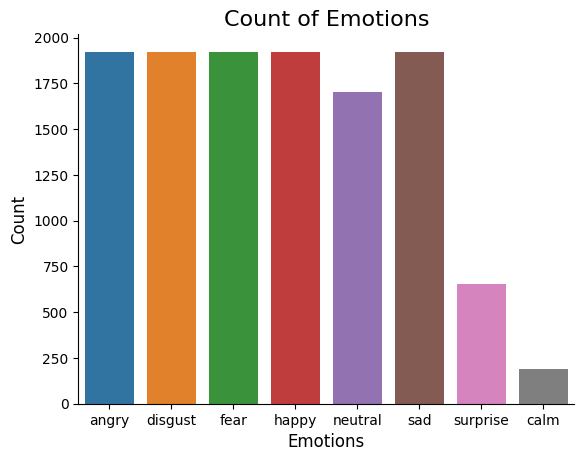

In [35]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=data_path['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [39]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

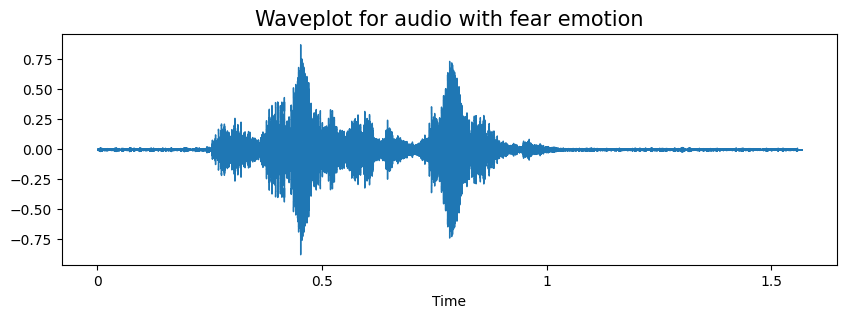

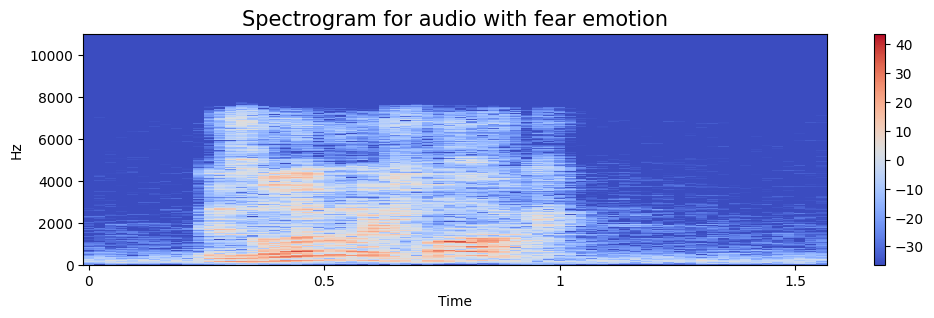

In [40]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

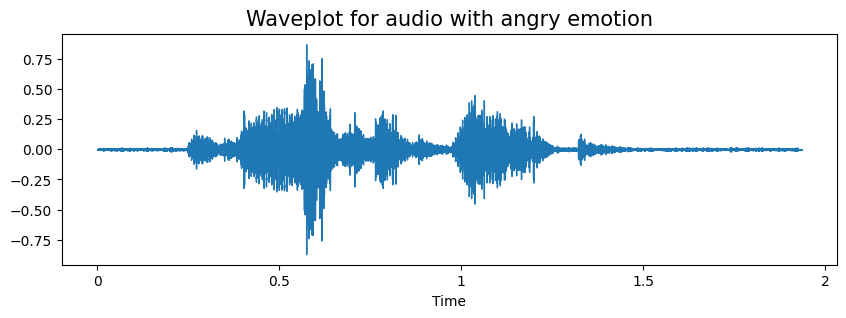

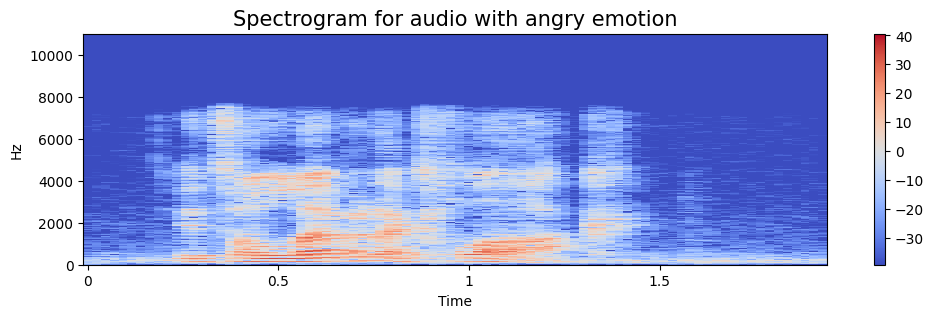

In [41]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

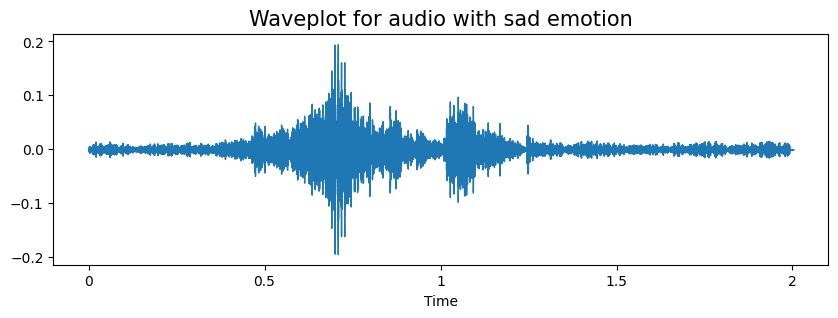

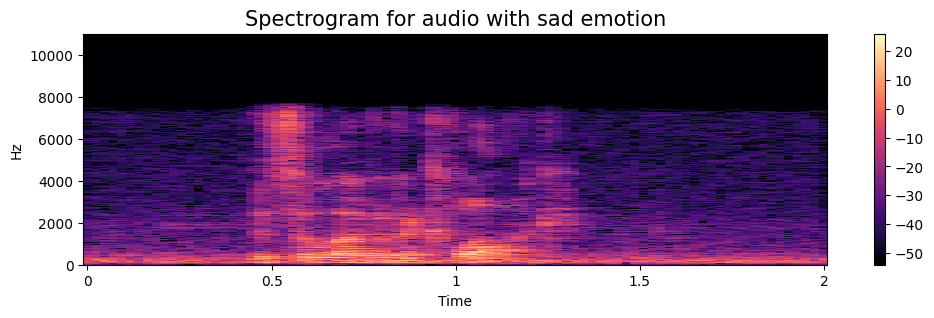

In [42]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

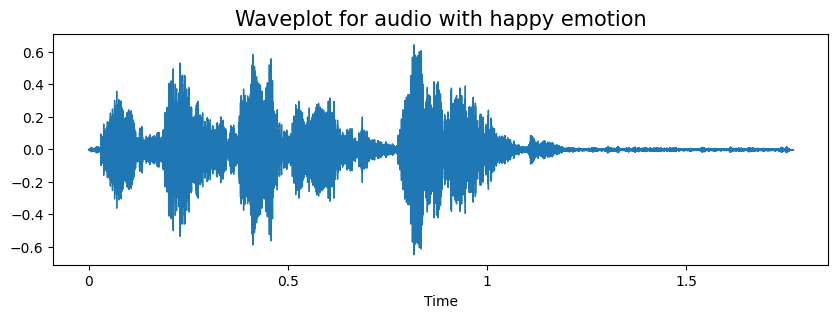

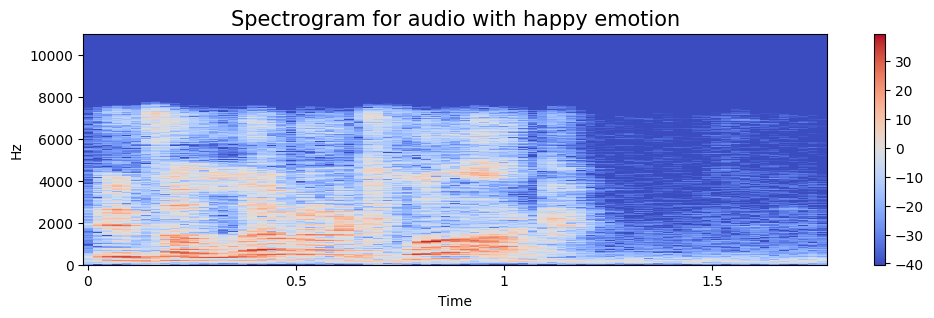

In [43]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [44]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

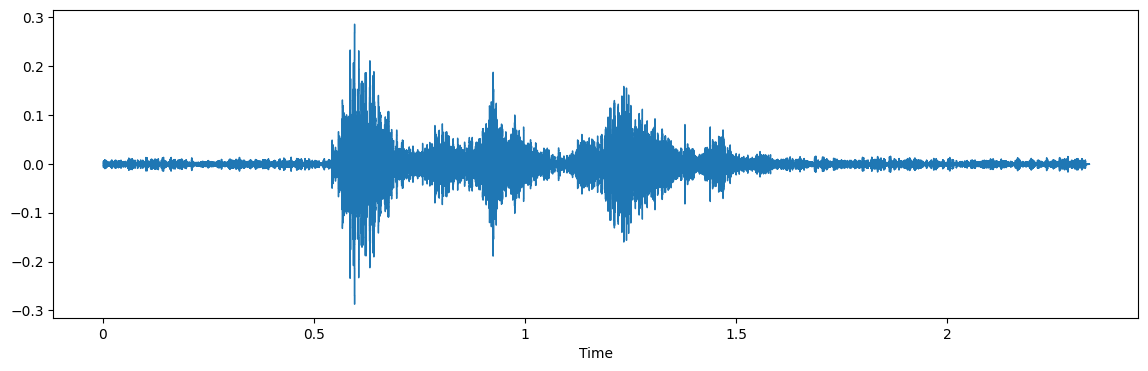

In [47]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

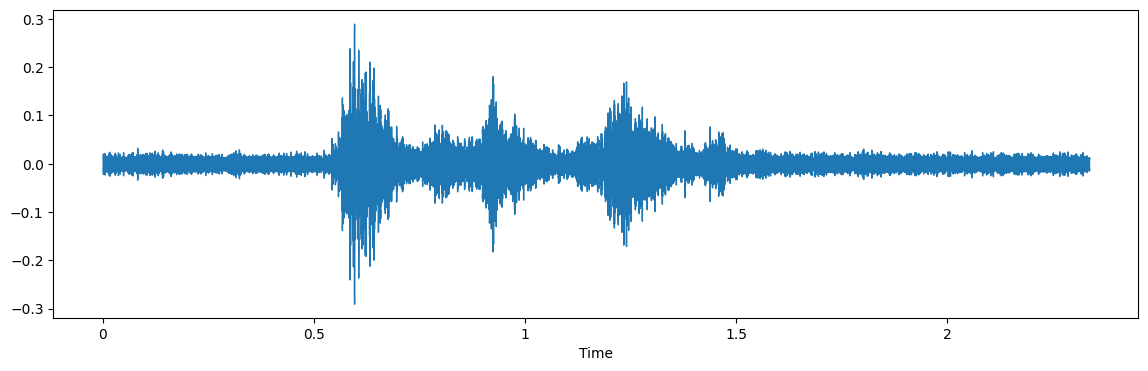

In [49]:
#noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

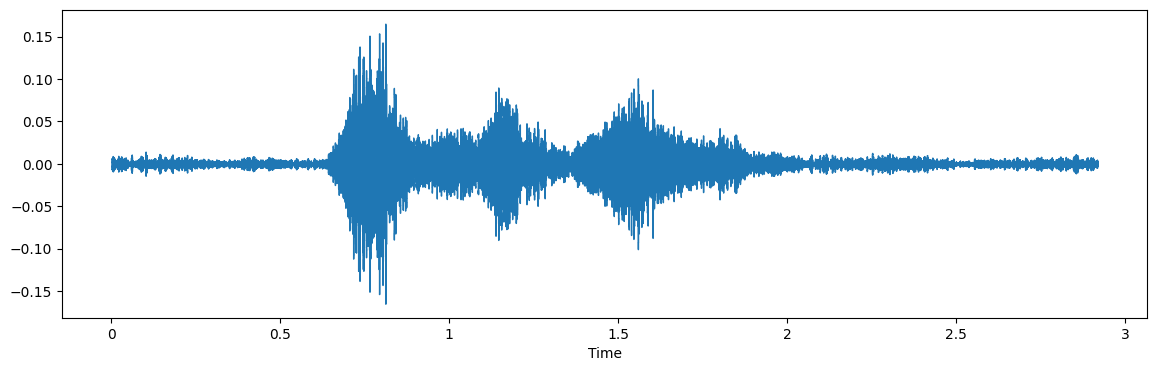

In [51]:
#stretch
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

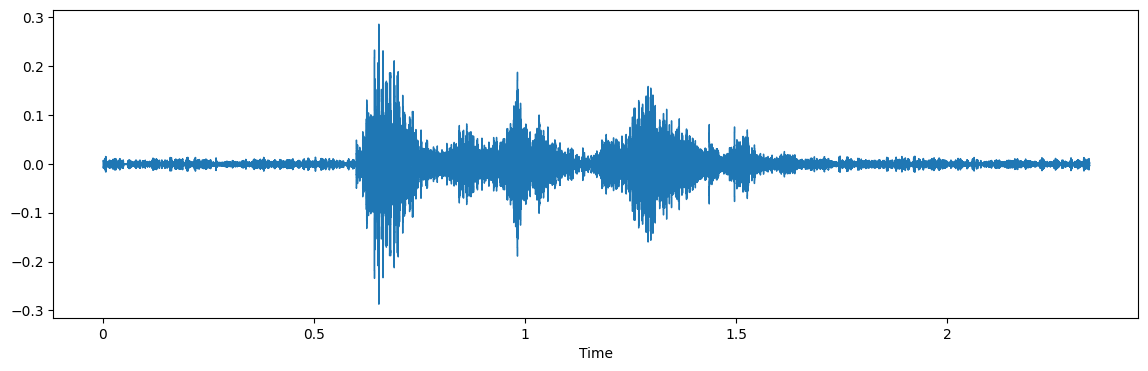

In [52]:
#shift
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

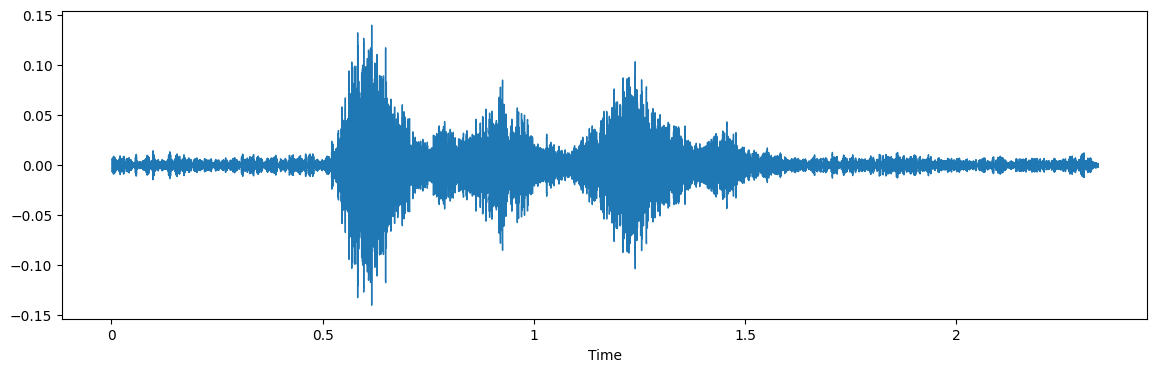

In [53]:
#pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)